<a href="https://colab.research.google.com/github/sergioGarcia91/TRE_NN_MesaLosSantos/blob/main/01_100NN_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.neural_network import MLPRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load plugs data

In [ ]:
path_save_plots = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/Figures/'
path_save_models = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/100NN_models/'

In [ ]:
url = 'https://raw.githubusercontent.com/sergioGarcia91/ML_and_EDA/main/Datasets/PlugsMesaLosSantos_2022.csv'
# CSV lugs
df_Plugs = pd.read_csv(url, sep=';', decimal='.')

df_Plugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Muestra              358 non-null    object 
 1   Estacion             358 non-null    object 
 2   MuestraNew           358 non-null    object 
 3   X                    358 non-null    float64
 4   Y                    358 non-null    float64
 5   Z                    358 non-null    float64
 6   Formacion Geologica  358 non-null    object 
 7   Unidad               358 non-null    object 
 8   Litologia            358 non-null    object 
 9   Abreviacion          358 non-null    object 
 10  Uni-Lito             358 non-null    object 
 11  Agua [%]             358 non-null    float64
 12  Porosidad [%]        358 non-null    float64
 13  Densidad [gr/cm3]    358 non-null    float64
 14  Rho Dry [Ohm*m]      358 non-null    float64
 15  Rho Wet [Ohm*m]      358 non-null    flo

In [ ]:
df_Plugs.head()

,Muestra,Estacion,MuestraNew,X,Y,Z,Formacion Geologica,Unidad,Litologia,Abreviacion,...,M Dry [mV/V],M Wet [mV/V],Vp [m/s],Peak Load [kN],Is50 [MPa],LF [SI],HF [SI],FD [%],Distancia Falla [m],Unnamed: 25
0,Ls5-12,LSN-01,LSN-01,1114949.39,1246238.02,1745.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,8.65,22.49,1059.0,1.32,0.41,0.000015,0.000024,-61.45,1579.23,NaN
1,Ls5-13a,LSN-02,LSN-02a,1115819.32,1247030.08,1761.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.65,21.16,1294.0,1.82,0.61,0.000008,0.000003,59.76,577.10,NaN
2,Ls5-13b,LSN-02,LSN-02b,1115819.32,1247030.08,1761.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.83,14.52,2550.0,0.52,0.33,0.000021,0.000032,-49.71,577.10,NaN
3,Ls6-01,LSN-03,LSN-03,1115324.37,1256812.13,1677.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,47.46,7.52,3297.0,0.72,0.24,0.000003,0.000002,50.98,21.24,NaN
4,Ls6-02,LSN-04,LSN-04,1115076.27,1257212.30,1608.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.74,33.65,2175.0,0.42,0.13,0.000021,0.000036,-69.97,211.66,NaN


In [ ]:
df_Plugs.columns

Index(['Muestra', 'Estacion', 'MuestraNew', 'X', 'Y', 'Z',
       'Formacion Geologica', 'Unidad', 'Litologia', 'Abreviacion', 'Uni-Lito',
       'Agua [%]', 'Porosidad [%]', 'Densidad [gr/cm3]', 'Rho Dry [Ohm*m]',
       'Rho Wet [Ohm*m]', 'M Dry [mV/V]', 'M Wet [mV/V]', 'Vp [m/s]',
       'Peak Load [kN]', 'Is50 [MPa]', 'LF [SI]', 'HF [SI]', 'FD [%]',
       'Distancia Falla [m]', 'Unnamed: 25'],
      dtype='object')

In [ ]:
df_Plugs['Litologia'].unique()

array(['arenisca', 'granito', 'metaarenisca', 'esquisto', 'conglomerado',
       'lodolita', 'caliza', 'arenisca calcarea', 'biomicrita',
       'lodo calcareo'], dtype=object)

# Get data of interest

The data of interest corresponds to:
- The columns `X`, `Y`, and `Z`, which represent the coordinates.
- The column `Litologia`, which corresponds to the classified lithology.
- The column `Rho Wet [Ohm*m]`, which corresponds to the resistivity values measured in the laboratory.  
- The target column will be porosity, `Porosidad [%]`, also measured in the laboratory.

In [ ]:
df = df_Plugs[['X', 'Y', 'Z', 'Litologia', 'Rho Wet [Ohm*m]', 'Porosidad [%]']].copy()

df.head()

,X,Y,Z,Litologia,Rho Wet [Ohm*m],Porosidad [%]
0,1114949.39,1246238.02,1745.0,arenisca,916.49,10.98
1,1115819.32,1247030.08,1761.0,arenisca,816.88,9.89
2,1115819.32,1247030.08,1761.0,arenisca,315.44,7.84
3,1115324.37,1256812.13,1677.0,arenisca,497.95,7.24
4,1115076.27,1257212.30,1608.0,arenisca,662.24,20.17


## Data normalization

The location coordinates (X, Y, Z) and the resistivity values will be normalized to the range of 0 to 1. The normalization will be done manually, considering the limits of La Mesa de Los Santos and using the minimum and maximum resistivity data, rounded accordingly.

Considering that resistivity is logarithmic, prior to normalization, the log10 will be calculated for that column, and then the minimum and maximum values will be considered for normalization.

In [ ]:
df.describe().round(2)

,X,Y,Z,Rho Wet [Ohm*m],Porosidad [%]
count,358.00,358.00,358.00,358.00,358.00
mean,1107876.26,1247329.00,1353.93,1905.93,4.85
std,5167.25,6687.66,228.39,3592.94,5.32
min,1098421.74,1237639.21,719.00,26.88,0.00
25%,1103871.44,1242118.74,1203.00,337.86,0.83
50%,1107507.64,1245813.24,1343.00,762.95,3.25
75%,1112396.46,1252772.15,1546.00,1869.98,7.22
max,1117932.04,1259982.90,1761.00,37015.69,32.93


In [ ]:
df['Rho Wet [Ohm*m]'] = np.log10(df['Rho Wet [Ohm*m]'])

df.describe().round(2)

,X,Y,Z,Rho Wet [Ohm*m],Porosidad [%]
count,358.00,358.00,358.00,358.00,358.00
mean,1107876.26,1247329.00,1353.93,2.90,4.85
std,5167.25,6687.66,228.39,0.56,5.32
min,1098421.74,1237639.21,719.00,1.43,0.00
25%,1103871.44,1242118.74,1203.00,2.53,0.83
50%,1107507.64,1245813.24,1343.00,2.88,3.25
75%,1112396.46,1252772.15,1546.00,3.27,7.22
max,1117932.04,1259982.90,1761.00,4.57,32.93


In [ ]:
df['X'] = (df['X'] - 1096700) / (1120100 - 1096700)
df['Y'] = (df['Y'] - 1235500) / (1260100 - 1235500)
df['Z'] = (df['Z'] - (500)) / (1830 - (500))
df['Rho Wet [Ohm*m]'] = (df['Rho Wet [Ohm*m]'] - (1)) / (5 - (1))

df.describe().round(2)

,X,Y,Z,Rho Wet [Ohm*m],Porosidad [%]
count,358.00,358.00,358.00,358.00,358.00
mean,0.48,0.48,0.64,0.48,4.85
std,0.22,0.27,0.17,0.14,5.32
min,0.07,0.09,0.16,0.11,0.00
25%,0.31,0.27,0.53,0.38,0.83
50%,0.46,0.42,0.63,0.47,3.25
75%,0.67,0.70,0.79,0.57,7.22
max,0.91,1.00,0.95,0.89,32.93


# OneHotEncoder

The `pd.get_dummies()` function will be used to perform One Hot Encoding on the `Litologia` column.

In [ ]:
df_encoded  = pd.get_dummies(df, columns=['Litologia'],
                             prefix='',
                             dtype=int)

df_encoded.head()

,X,Y,Z,Rho Wet [Ohm*m],Porosidad [%],_arenisca,_arenisca calcarea,_biomicrita,_caliza,_conglomerado,_esquisto,_granito,_lodo calcareo,_lodolita,_metaarenisca
0,0.779888,0.436505,0.936090,0.490532,10.98,1,0,0,0,0,0,0,0,0,0
1,0.817065,0.468702,0.948120,0.478040,9.89,1,0,0,0,0,0,0,0,0,0
2,0.817065,0.468702,0.948120,0.374729,7.84,1,0,0,0,0,0,0,0,0,0
3,0.795913,0.866347,0.884962,0.424296,7.24,1,0,0,0,0,0,0,0,0,0
4,0.785311,0.882614,0.833083,0.455254,20.17,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Move the 'Porosidad [%]' column to the end
column_to_move = 'Porosidad [%]'
df_encoded = df_encoded[[col for col in df_encoded.columns if col != column_to_move] + [column_to_move]]

# Include the 'Litologia' column to facilitate data augmentation
df_encoded = pd.concat([df_encoded, df['Litologia']], axis=1)

df_encoded.head()

,X,Y,Z,Rho Wet [Ohm*m],_arenisca,_arenisca calcarea,_biomicrita,_caliza,_conglomerado,_esquisto,_granito,_lodo calcareo,_lodolita,_metaarenisca,Porosidad [%],Litologia
0,0.779888,0.436505,0.936090,0.490532,1,0,0,0,0,0,0,0,0,0,10.98,arenisca
1,0.817065,0.468702,0.948120,0.478040,1,0,0,0,0,0,0,0,0,0,9.89,arenisca
2,0.817065,0.468702,0.948120,0.374729,1,0,0,0,0,0,0,0,0,0,7.84,arenisca
3,0.795913,0.866347,0.884962,0.424296,1,0,0,0,0,0,0,0,0,0,7.24,arenisca
4,0.785311,0.882614,0.833083,0.455254,1,0,0,0,0,0,0,0,0,0,20.17,arenisca


In [ ]:
df_encoded['Litologia'].value_counts()

,count
Litologia,
arenisca,150
biomicrita,48
caliza,44
lodolita,27
esquisto,20
conglomerado,19
arenisca calcarea,18
lodo calcareo,18
granito,8


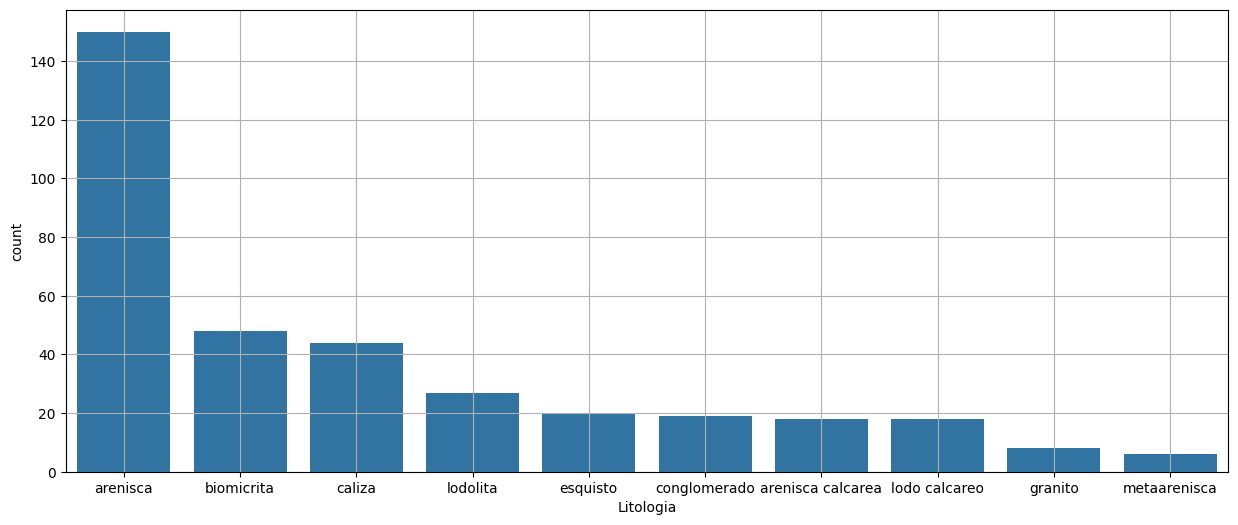

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(df_encoded, x='Litologia', order=df_encoded['Litologia'].value_counts().index)

plt.grid()

plt.show()


# Split and training

In [ ]:
print_text = False
print_text_Training = True
verbose_print = False

count_models = 1
target_score = 0.7

count_trial = 1

train_score_list = []
test_score_list = []
models_name_list = []
elapsed_time_list = []
trial_list = []


df = df_encoded.copy()

while count_models < 101:

  # Create empty DataFrames for train and test
  df_train = pd.DataFrame()
  df_test = pd.DataFrame()

  # Iterate over the unique values of the 'Litologia' column
  for category in df['Litologia'].unique():
    # Filter data
    category_data = df[df['Litologia'] == category]

    # Calculate 80% for train and 20% for test
    train_size = int(0.8 * len(category_data))
    test_size = len(category_data) - train_size

    # Select randomly to shuffle the data
    category_data = category_data.sample(frac=1).reset_index(drop=True)

    # Split into train and test
    category_train = category_data[:train_size]
    category_test = category_data[train_size:]

    if print_text:
      print(f'Category: {category}')
      print(f'Train size: {len(category_train)}')
      print(f'Test size: {len(category_test)}')
      print(f'Total size: {len(category_data)}')
      print('---'*3)

    while len(category_train) < 300:
      # Repeat data randomly until reaching 300
      category_train = pd.concat([category_train, category_train.sample(n=300 - len(category_train), replace=True)], ignore_index=True)
    if print_text:
      print(f'Train size: {len(category_train)}')
      print('\n')

    # Concatenate the data into the corresponding DataFrames
    df_train = pd.concat([df_train, category_train], ignore_index=True)
    df_test = pd.concat([df_test, category_test], ignore_index=True)
  if print_text:
    print(f'DF Train size: {df_train.shape[0]}')
    print(f'DF Test size: {df_test.shape[0]}')
    print('\n')

  # Datos to Train and Test
  X_train = df_train.iloc[:, :-2].to_numpy()
  y_train = df_train['Porosidad [%]'].to_numpy()

  X_test = df_test.iloc[:, :-2].to_numpy()
  y_test = df_test['Porosidad [%]'].to_numpy()

  # Generate noise with normal distribution (mean 0, standard deviation 5%)
  noise = np.random.normal(0, 0.05, size=X_train.shape)
  X_train = X_train * (1 + noise)

  if print_text:
    print('Shapes X_train, y_train, X_test, y_test')
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

  # Create the model
  hidden_layers = [28, 14, 7, 3]
  modelNN_MLPReg = MLPRegressor(hidden_layer_sizes=tuple(hidden_layers),
                                activation='relu',
                                verbose=verbose_print,
                                solver='adam',
                                max_iter=1000,
                                learning_rate= 'adaptive', #'adaptive', 'constant',
                                learning_rate_init=0.001,
                                tol=1e-5,
                                early_stopping=True,
                                n_iter_no_change=20,
                                validation_fraction=0.2)

  # Start the timer
  start_time = time.time()

  # Train the model
  print('---'*10)
  print(f'Trial: {count_trial}')
  modelNN_MLPReg.fit(X_train, y_train)

  # End the timer
  end_time = time.time()

  # Calculate the elapsed time
  elapsed_time = end_time - start_time

  train_score = modelNN_MLPReg.score(X_train, y_train)
  test_score = modelNN_MLPReg.score(X_test, y_test)

  if train_score > target_score:
    if print_text_Training:
      print(f'Train score: {train_score:.4f}')
      print(f'Test score: {test_score:.4f}')
      print(f'Elapsed time: {elapsed_time:.2f} seconds')
      print('\n')

    # Save model
    if count_models < 10:
      Name = f'model_NN_00{count_models}.pkl'
    elif count_models < 100:
      Name = f'model_NN_0{count_models}.pkl'
    else:
      Name = f'model_NN_{count_models}.pkl'

    joblib.dump(modelNN_MLPReg, path_save_models + Name)
    print(f'---> Model saved as {Name}')
    print('\n')

    train_score_list.append(train_score)
    test_score_list.append(test_score)
    models_name_list.append(Name)
    elapsed_time_list.append(round(elapsed_time, 2))
    trial_list.append(count_trial)

    count_models += 1

  else:
    print(f'Train score: {train_score:.4f}')
    print(f'Elapsed time: {elapsed_time:.2f} seconds')
    print('No model was generated.')
    print('\n')

  count_trial += 1


------------------------------
Trial: 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.5726
Elapsed time: 12.83 seconds
No model was generated.


------------------------------
Trial: 2
Train score: 0.7283
Test score: 0.3616
Elapsed time: 2.98 seconds


---> Model saved as model_NN_001.pkl


------------------------------
Trial: 3
Train score: 0.6630
Elapsed time: 4.40 seconds
No model was generated.


------------------------------
Trial: 4
Train score: -0.0018
Elapsed time: 7.22 seconds
No model was generated.


------------------------------
Trial: 5
Train score: 0.7822
Test score: 0.1570
Elapsed time: 9.03 seconds


---> Model saved as model_NN_002.pkl


------------------------------
Trial: 6
Train score: 0.7609
Test score: 0.4561
Elapsed time: 8.80 seconds


---> Model saved as model_NN_003.pkl


------------------------------
Trial: 7
Train score: 0.6926
Elapsed time: 4.53 seconds
No model was generated.


------------------------------
Trial: 8
Train score: 0.7662
Test score: 0.2234
Elapsed time: 6.06 seconds


---> Model saved as model_NN_004.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.5308
Elapsed time: 12.76 seconds
No model was generated.


------------------------------
Trial: 28
Train score: 0.0711
Elapsed time: 8.38 seconds
No model was generated.


------------------------------
Trial: 29
Train score: 0.7050
Test score: 0.3929
Elapsed time: 3.71 seconds


---> Model saved as model_NN_016.pkl


------------------------------
Trial: 30
Train score: -0.0010
Elapsed time: 5.93 seconds
No model was generated.


------------------------------
Trial: 31
Train score: -0.0004
Elapsed time: 7.41 seconds
No model was generated.


------------------------------
Trial: 32
Train score: 0.7582
Test score: 0.3801
Elapsed time: 8.98 seconds


---> Model saved as model_NN_017.pkl


------------------------------
Trial: 33
Train score: -0.0001
Elapsed time: 7.60 seconds
No model was generated.


------------------------------
Trial: 34
Train score: -0.0020
Elapsed time: 5.78 seconds
No model was generated.


------------------------------
Trial: 35
Train score: -0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.6998
Elapsed time: 11.53 seconds
No model was generated.


------------------------------
Trial: 44
Train score: 0.7446
Test score: 0.5195
Elapsed time: 11.25 seconds


---> Model saved as model_NN_022.pkl


------------------------------
Trial: 45
Train score: 0.7129
Test score: 0.3802
Elapsed time: 6.32 seconds


---> Model saved as model_NN_023.pkl


------------------------------
Trial: 46
Train score: -0.0022
Elapsed time: 5.42 seconds
No model was generated.


------------------------------
Trial: 47


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.4342
Elapsed time: 12.64 seconds
No model was generated.


------------------------------
Trial: 48
Train score: 0.3202
Elapsed time: 12.46 seconds
No model was generated.


------------------------------
Trial: 49
Train score: -0.0009
Elapsed time: 5.28 seconds
No model was generated.


------------------------------
Trial: 50
Train score: 0.7872
Test score: 0.4774
Elapsed time: 7.87 seconds


---> Model saved as model_NN_024.pkl


------------------------------
Trial: 51
Train score: 0.7101
Test score: -0.1683
Elapsed time: 6.35 seconds


---> Model saved as model_NN_025.pkl


------------------------------
Trial: 52
Train score: 0.6681
Elapsed time: 4.52 seconds
No model was generated.


------------------------------
Trial: 53
Train score: 0.6514
Elapsed time: 6.85 seconds
No model was generated.


------------------------------
Trial: 54
Train score: 0.7814
Test score: 0.2887
Elapsed time: 6.19 seconds


---> Model saved as model_NN_026.pkl


-----------------------

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.7361
Test score: -0.0360
Elapsed time: 12.03 seconds


---> Model saved as model_NN_029.pkl


------------------------------
Trial: 60
Train score: 0.6172
Elapsed time: 5.62 seconds
No model was generated.


------------------------------
Trial: 61
Train score: -0.0053
Elapsed time: 6.03 seconds
No model was generated.


------------------------------
Trial: 62
Train score: 0.7207
Test score: 0.2623
Elapsed time: 5.84 seconds


---> Model saved as model_NN_030.pkl


------------------------------
Trial: 63
Train score: -0.0012
Elapsed time: 6.24 seconds
No model was generated.


------------------------------
Trial: 64


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.7916
Test score: 0.2042
Elapsed time: 12.66 seconds


---> Model saved as model_NN_031.pkl


------------------------------
Trial: 65
Train score: 0.7080
Test score: 0.5154
Elapsed time: 6.92 seconds


---> Model saved as model_NN_032.pkl


------------------------------
Trial: 66


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.7669
Test score: 0.0224
Elapsed time: 12.70 seconds


---> Model saved as model_NN_033.pkl


------------------------------
Trial: 67
Train score: 0.7226
Test score: 0.5701
Elapsed time: 8.15 seconds


---> Model saved as model_NN_034.pkl


------------------------------
Trial: 68
Train score: -0.0002
Elapsed time: 6.73 seconds
No model was generated.


------------------------------
Trial: 69
Train score: 0.8010
Test score: 0.3331
Elapsed time: 11.95 seconds


---> Model saved as model_NN_035.pkl


------------------------------
Trial: 70


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.2757
Elapsed time: 10.82 seconds
No model was generated.


------------------------------
Trial: 71
Train score: 0.6402
Elapsed time: 5.05 seconds
No model was generated.


------------------------------
Trial: 72
Train score: 0.6795
Elapsed time: 6.01 seconds
No model was generated.


------------------------------
Trial: 73
Train score: 0.7722
Test score: 0.0451
Elapsed time: 8.04 seconds


---> Model saved as model_NN_036.pkl


------------------------------
Trial: 74
Train score: 0.2971
Elapsed time: 8.75 seconds
No model was generated.


------------------------------
Trial: 75
Train score: 0.8210
Test score: -0.0464
Elapsed time: 9.83 seconds


---> Model saved as model_NN_037.pkl


------------------------------
Trial: 76
Train score: 0.7273
Test score: 0.4731
Elapsed time: 7.33 seconds


---> Model saved as model_NN_038.pkl


------------------------------
Trial: 77
Train score: 0.7529
Test score: 0.1153
Elapsed time: 9.13 seconds


---> Model saved as model_NN_0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.5586
Elapsed time: 12.58 seconds
No model was generated.


------------------------------
Trial: 99
Train score: 0.7200
Test score: 0.5395
Elapsed time: 7.56 seconds


---> Model saved as model_NN_052.pkl


------------------------------
Trial: 100


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.5657
Elapsed time: 12.88 seconds
No model was generated.


------------------------------
Trial: 101
Train score: -0.0006
Elapsed time: 6.89 seconds
No model was generated.


------------------------------
Trial: 102
Train score: 0.7068
Test score: 0.4917
Elapsed time: 7.45 seconds


---> Model saved as model_NN_053.pkl


------------------------------
Trial: 103
Train score: 0.6325
Elapsed time: 4.52 seconds
No model was generated.


------------------------------
Trial: 104
Train score: 0.7268
Test score: 0.3657
Elapsed time: 5.28 seconds


---> Model saved as model_NN_054.pkl


------------------------------
Trial: 105
Train score: 0.7592
Test score: 0.3260
Elapsed time: 10.19 seconds


---> Model saved as model_NN_055.pkl


------------------------------
Trial: 106
Train score: -0.0000
Elapsed time: 8.52 seconds
No model was generated.


------------------------------
Trial: 107
Train score: 0.6492
Elapsed time: 2.99 seconds
No model was generated.


----------------

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.5473
Elapsed time: 11.28 seconds
No model was generated.


------------------------------
Trial: 110
Train score: 0.5684
Elapsed time: 4.38 seconds
No model was generated.


------------------------------
Trial: 111
Train score: 0.7427
Test score: 0.3922
Elapsed time: 6.34 seconds


---> Model saved as model_NN_057.pkl


------------------------------
Trial: 112
Train score: 0.6934
Elapsed time: 8.44 seconds
No model was generated.


------------------------------
Trial: 113
Train score: 0.8156
Test score: -0.0498
Elapsed time: 4.98 seconds


---> Model saved as model_NN_058.pkl


------------------------------
Trial: 114
Train score: 0.6879
Elapsed time: 4.48 seconds
No model was generated.


------------------------------
Trial: 115
Train score: 0.6938
Elapsed time: 7.97 seconds
No model was generated.


------------------------------
Trial: 116
Train score: 0.7660
Test score: 0.2800
Elapsed time: 4.83 seconds


---> Model saved as model_NN_059.pkl


------------------

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.7146
Test score: 0.4949
Elapsed time: 12.47 seconds


---> Model saved as model_NN_061.pkl


------------------------------
Trial: 121
Train score: 0.0848
Elapsed time: 7.43 seconds
No model was generated.


------------------------------
Trial: 122
Train score: 0.6987
Elapsed time: 7.05 seconds
No model was generated.


------------------------------
Trial: 123
Train score: 0.8206
Test score: -0.1582
Elapsed time: 7.88 seconds


---> Model saved as model_NN_062.pkl


------------------------------
Trial: 124
Train score: -0.0001
Elapsed time: 8.13 seconds
No model was generated.


------------------------------
Trial: 125
Train score: 0.7596
Test score: 0.4764
Elapsed time: 10.65 seconds


---> Model saved as model_NN_063.pkl


------------------------------
Trial: 126
Train score: 0.8043
Test score: 0.0007
Elapsed time: 7.47 seconds


---> Model saved as model_NN_064.pkl


------------------------------
Trial: 127
Train score: 0.7087
Test score: 0.2889
Elapsed time: 8.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.5596
Elapsed time: 12.39 seconds
No model was generated.


------------------------------
Trial: 149
Train score: 0.7660
Test score: 0.2676
Elapsed time: 7.35 seconds


---> Model saved as model_NN_078.pkl


------------------------------
Trial: 150
Train score: 0.7320
Test score: 0.2971
Elapsed time: 9.93 seconds


---> Model saved as model_NN_079.pkl


------------------------------
Trial: 151
Train score: 0.7257
Test score: 0.3478
Elapsed time: 3.65 seconds


---> Model saved as model_NN_080.pkl


------------------------------
Trial: 152
Train score: 0.6935
Elapsed time: 5.74 seconds
No model was generated.


------------------------------
Trial: 153
Train score: -0.0006
Elapsed time: 7.75 seconds
No model was generated.


------------------------------
Trial: 154
Train score: 0.7646
Test score: 0.2000
Elapsed time: 8.45 seconds


---> Model saved as model_NN_081.pkl


------------------------------
Trial: 155
Train score: 0.7554
Test score: 0.5031
Elapsed time: 11.5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.5904
Elapsed time: 12.65 seconds
No model was generated.


------------------------------
Trial: 163
Train score: 0.7431
Test score: 0.1147
Elapsed time: 7.21 seconds


---> Model saved as model_NN_085.pkl


------------------------------
Trial: 164
Train score: 0.6821
Elapsed time: 7.40 seconds
No model was generated.


------------------------------
Trial: 165
Train score: 0.7769
Test score: 0.4759
Elapsed time: 12.32 seconds


---> Model saved as model_NN_086.pkl


------------------------------
Trial: 166
Train score: -0.0001
Elapsed time: 5.59 seconds
No model was generated.


------------------------------
Trial: 167
Train score: 0.7654
Test score: 0.2206
Elapsed time: 5.77 seconds


---> Model saved as model_NN_087.pkl


------------------------------
Trial: 168
Train score: 0.7334
Test score: 0.5887
Elapsed time: 8.11 seconds


---> Model saved as model_NN_088.pkl


------------------------------
Trial: 169
Train score: 0.8227
Test score: 0.0347
Elapsed time: 6.1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 0.7795
Test score: 0.3974
Elapsed time: 13.76 seconds


---> Model saved as model_NN_096.pkl


------------------------------
Trial: 179
Train score: -0.0000
Elapsed time: 8.42 seconds
No model was generated.


------------------------------
Trial: 180
Train score: 0.7636
Test score: 0.2781
Elapsed time: 7.61 seconds


---> Model saved as model_NN_097.pkl


------------------------------
Trial: 181
Train score: 0.7918
Test score: 0.3494
Elapsed time: 11.80 seconds


---> Model saved as model_NN_098.pkl


------------------------------
Trial: 182
Train score: 0.7520
Test score: 0.3767
Elapsed time: 5.16 seconds


---> Model saved as model_NN_099.pkl


------------------------------
Trial: 183
Train score: 0.7290
Test score: 0.2282
Elapsed time: 6.56 seconds


---> Model saved as model_NN_100.pkl




# Df models

In [ ]:
dict_model = {'Trial': trial_list,
              'Model': models_name_list,
              'Train score': train_score_list,
              'Test score': test_score_list,
              'Elapsed time': elapsed_time_list}

df_models = pd.DataFrame(dict_model)

df_models

,Trial,Model,Train score,Test score,Elapsed time
0,2,model_NN_001.pkl,0.728330,0.361610,2.98
1,5,model_NN_002.pkl,0.782221,0.156952,9.03
2,6,model_NN_003.pkl,0.760900,0.456133,8.80
3,8,model_NN_004.pkl,0.766156,0.223407,6.06
4,9,model_NN_005.pkl,0.762988,0.285087,4.28
...,...,...,...,...,...
95,178,model_NN_096.pkl,0.779486,0.397377,13.76
96,180,model_NN_097.pkl,0.763601,0.278118,7.61
97,181,model_NN_098.pkl,0.791781,0.349351,11.80
98,182,model_NN_099.pkl,0.751963,0.376701,5.16


In [ ]:
df_models.describe().round(2)

,Trial,Train score,Test score,Elapsed time
count,100.00,100.00,100.00,100.00
mean,96.88,0.76,0.28,7.76
std,54.21,0.03,0.21,2.44
min,2.00,0.70,-0.67,2.98
25%,53.25,0.73,0.19,6.07
50%,96.50,0.76,0.31,7.58
75%,141.75,0.78,0.42,9.34
max,183.00,0.83,0.59,13.76


## Save Df

In [ ]:
df_models.to_csv(path_save_models + 'df_100models.csv',
                 sep=';',
                 decimal=',',
                 index=False)

# End